In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [ ]:
patients=pd.read_csv('/content/drive/MyDrive/datasets/patients.csv')
encounters=pd.read_csv('/content/drive/MyDrive/datasets/encounters.csv')
medication=pd.read_csv('/content/drive/MyDrive/datasets/medications.csv')

In [ ]:
print('The shape of patients table:',patients.shape)
print('The shape of encounters table:',encounters.shape)
print('The shape of medication table:',medication.shape)

The shape of patients table: (11628, 25)
The shape of encounters table: (1414254, 14)
The shape of medication table: (556392, 13)


In [ ]:
print('The name of the patients table columns:',patients.columns)
print('The name of the encounters table columns:',encounters.columns)
print('The name of the medication table columns:',medication.columns)

The name of the patients table columns: Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')
The name of the encounters table columns: Index(['Id', 'START', 'STOP', 'PATIENT', 'PROVIDER', 'PAYER', 'ENCOUNTERCLASS',
       'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST',
       'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')
The name of the medication table columns: Index(['START', 'STOP', 'PATIENT', 'PAYER', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'BASE_COST', 'PAYER_COVERAGE', 'DISPENSES', 'TOTALCOST', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')


In [ ]:
pat_enc=pd.merge(patients,encounters,how='outer')
pat_enc.shape

(1425882, 38)

In [ ]:
pat_enc.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'START',
       'STOP', 'PATIENT', 'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'CODE',
       'DESCRIPTION', 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST',
       'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')

In [ ]:
pat_enc.head(n=2)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,NaN,999-17-6800,S99989157,X56122130X,Mr.,Toby274,Weissnat378,NaN,NaN,M,white,nonhispanic,M,Boston Massachusetts US,158 Dickens Run Apt 28,Peabody,Massachusetts,Essex County,1940.0,42.528637,-70.978363,1151953.87,3977.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2d0a9468-9cc7-47c6-a757-2944fb7a754d,2000-09-28,NaN,999-29-7379,S99924139,NaN,Mr.,Don899,Kris249,NaN,NaN,NaN,black,nonhispanic,M,Boston Massachusetts US,1040 Rogahn Well Apt 6,Norwell,Massachusetts,Plymouth County,NaN,42.137960,-70.790171,451545.13,5476.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pat_enc_df=pat_enc[['FIRST','MARITAL','RACE','ETHNICITY','GENDER','CITY','STATE','COUNTY',
                    'HEALTHCARE_EXPENSES','HEALTHCARE_COVERAGE','PATIENT','PROVIDER','PAYER','DESCRIPTION']]

In [ ]:
pat_enc_df.columns

Index(['FIRST', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'CITY', 'STATE',
       'COUNTY', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'PATIENT',
       'PROVIDER', 'PAYER', 'DESCRIPTION'],
      dtype='object')

In [ ]:
pat_enc_df[['RACE','ETHNICITY']].groupby('ETHNICITY').count().sort_values('ETHNICITY',ascending=False)

,RACE
ETHNICITY,
nonhispanic,10318
hispanic,1310


Ethnicity is the fact or state of belonging to a social group that has a common national or cultural tradition 

---



1.   Non-Hispanic Whites (also referred to as Anglo-​Americans) are European Americans, Middle Eastern Americans, and North African
2.   Hispanic or Latino to refer to a person of Cuban, Mexican,South or Central
American, or other Spanish culture or origin regardless of race and states that Hispanics or Latinos can be of any race, any ancestry, any ethnicity. 

---

We can see its not a mixture of one particular group of people ,as per the data set the health condition data as per by ethnicity we can say that 95% of data belongs from UNITED STATES of AMERICA



In [ ]:
pat_enc_df[['ETHNICITY','GENDER']].groupby('GENDER').count().sort_values('ETHNICITY',ascending=False)

,ETHNICITY
GENDER,
F,5921
M,5707


In [ ]:

pat_enc_df[['ETHNICITY','COUNTY']].groupby('COUNTY').count().sort_values('COUNTY',ascending=False)

,ETHNICITY
COUNTY,
Worcester County,1459
Suffolk County,1295
Plymouth County,893
Norfolk County,1144
Nantucket County,13
Middlesex County,2621
Hampshire County,320
Hampden County,768
Franklin County,118


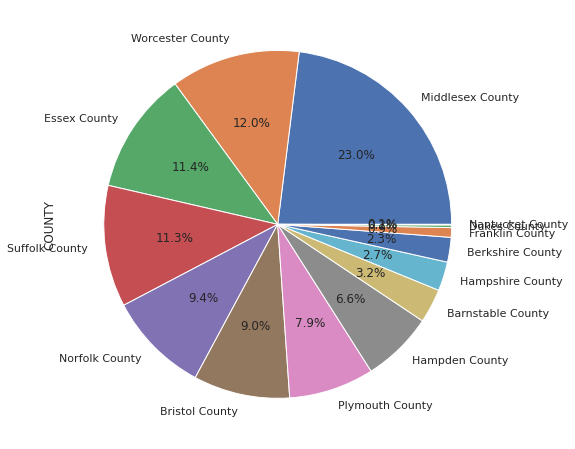

In [ ]:
plt.figure(figsize=(8,8))
pat_enc_df.COUNTY[pat_enc_df.GENDER=='M'].value_counts().plot(kind='pie',autopct='%1.1f%%')

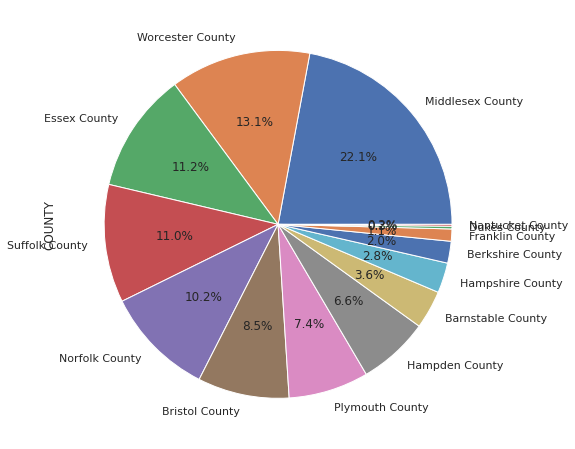

In [ ]:
plt.figure(figsize=(8,8))
pat_enc_df.COUNTY[pat_enc_df.GENDER=='F'].value_counts().plot(kind='pie',autopct='%1.1f%%')

The ratio between male and female is almost equal not much difference in terms of percentage between the gender within the country

In [ ]:
medication.head(n=2)

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,1993-04-29,1993-05-13,2d0a9468-9cc7-47c6-a757-2944fb7a754d,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,4548cd8e-7578-46b5-8028-2b2164b00b6d,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,39.19,0.0,1,39.19,444814009.0,Viral sinusitis (disorder)
1,1996-02-02,1996-02-09,2d0a9468-9cc7-47c6-a757-2944fb7a754d,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,3c6727fd-c572-481c-85ae-9832b147a021,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,64.34,0.0,1,64.34,444814009.0,Viral sinusitis (disorder)


In [ ]:
medication[['REASONDESCRIPTION','DESCRIPTION']].groupby('DESCRIPTION').count() \
.sort_values('REASONDESCRIPTION',ascending=False).head()

,REASONDESCRIPTION
DESCRIPTION,
Hydrochlorothiazide 25 MG Oral Tablet,48165
insulin human isophane 70 UNT/ML / Regular Insulin Human 30 UNT/ML Injectable Suspension [Humulin],36727
amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG / Olmesartan medoxomil 20 MG Oral Tablet,32477
Atenolol 50 MG / Chlorthalidone 25 MG Oral Tablet,31789
1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen],28019


Medication such as :

Hydrochlorothiazide 25 MG/amLODIPine 5 MG-To treat Blood Pressure.
insulin human isophane 70 UNT/ML / Regular Insulin Human 30- To control high blood sugar in adults with diabetes mellitus.
Atenolol and chlorthalidone-To treat hypertension.
Epoetin Alfa 4000 -To treat anemia (a lower than normal number of red blood cells) in people with chronic kidney failure (condition in which the kidneys slowly and permanently stop working over a period of time)

In [ ]:
medication[['DESCRIPTION','TOTALCOST']].groupby('DESCRIPTION').count() \
.sort_values('TOTALCOST',ascending=False).head()

,TOTALCOST
DESCRIPTION,
Hydrochlorothiazide 25 MG Oral Tablet,48165
insulin human isophane 70 UNT/ML / Regular Insulin Human 30 UNT/ML Injectable Suspension [Humulin],36727
amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG / Olmesartan medoxomil 20 MG Oral Tablet,32477
Atenolol 50 MG / Chlorthalidone 25 MG Oral Tablet,31789
Acetaminophen 325 MG Oral Tablet,28688


Medication for diabetes ,hypertension,kidney problem cost more than any other occurence

In [ ]:
medication[['REASONDESCRIPTION','TOTALCOST']].groupby('REASONDESCRIPTION').count() \
.sort_values('TOTALCOST',ascending=False).head()

,TOTALCOST
REASONDESCRIPTION,
Hypertension,129417
Diabetes,64750
Childhood asthma,47698
Anemia (disorder),28019
Acute bronchitis (disorder),26230


**Hypertension,Diabetes ,Childhood asthma ,Anemia (disorder),Acute bronchitis (disorder)**

---
Patient encountering mostly with diabetes,kindey,hypertension,asthma issue which is very much frequent in human life and medical companies must focus on such product which might boost companies share and such medication is often to continue life long.

---
We have seen in covid-19 80% people who are suffering from such condition often seems struggling for immunity,which might be challenges for medical companies as well as for our doctors to find out the overall solution for such cases.